# Run this in the SEED EEG File

In [1]:
import os
import numpy as np 
import pickle
from ipynb.fs.full.get_extracted_data import getDE_data
from ipynb.fs.full.LabelTesting import makeOutThreeArr
import tensorflow as tf
from ipynb.fs.full.featureExtraction import getAllFeatureData

### data prepping

In [2]:
x_data=getAllFeatureData()

In [3]:
label=x_data[:, 310]
x_data=np.delete(x_data, 310, 1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, makeOutThreeArr(label), test_size=0.1)

## function for visualizing the loses

In [7]:
import matplotlib.pyplot as plt
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

## defining model (can be better)

In [8]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(310,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                  metrics=['accuracy'])

## model traning, will take a bit (make sure laptop is plugged in)

In [9]:
history = nn_model.fit(
    X_train, y_train, epochs=500, batch_size=50, validation_split=0.2, verbose=0
  )

## training visualization

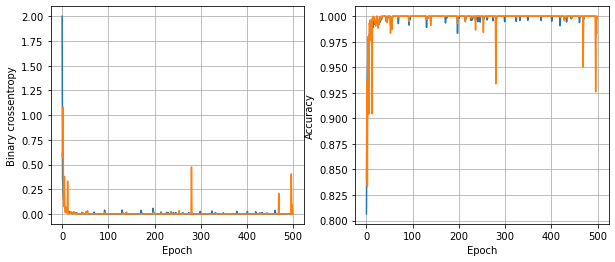

In [10]:
plot_history(history)

## testing model

In [12]:
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

160/160 [==============================] - 0s 1ms/step


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1774
           1       1.00      1.00      1.00      1630
           2       1.00      1.00      1.00      1687

   micro avg       1.00      1.00      1.00      5091
   macro avg       1.00      1.00      1.00      5091
weighted avg       1.00      1.00      1.00      5091
 samples avg       1.00      1.00      1.00      5091

